<a href="https://colab.research.google.com/github/deepakshekhawat1209/telecom_churn/blob/main/telecom_churn_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#Prepared by
#1) Deepak Shekhawat
#2) Abhishek Sharma

#Business Understanding Of A Telecom Industry Customer Churn:
Customer churn is a big problem in any industry and one of the most important concerns for the Telecom industry. The effect on the revenues of the companies, because of this customer churns is huge, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate, and it costs 5-10 times more to acquire a new customer than to retain an existing one, that's why customer retention has now become even more important than customer acquisition.

Therefore, finding those factors that increase customer churn is important to take necessary actions to reduce this churn. The main goal of our project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.

#Business Objective
Maximize: Company's profit by retaining customer.
 
 Minimize: Customer churn by identifying the key cause of the problem

#The main objective of the project is to :

Finding factors and cause those influence customers to churn.
Retain churn customers by taking appropriate steps
Providing offers based on affecting factors.

In [ ]:
#importing the necessary modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the csv file using pandas
telecom_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/modules/module-1: python/capstone project/Telecom Churn.csv')

In [ ]:
#size of the dataset row*col
telecom_data.shape

(3333, 20)

In [ ]:
#lets see what is inside the data
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Features of column:

**STATE:**  States code

**Account Length:** Length of the Account

**Area Code:** Code Number of Area

**International Plan:** This column represent whether customer has International plan or not.Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:**This column represent whether customer has Voice Mail Plan or not. Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages sent by the customer

**Total day minutes:** Total Number of Minutes Spent in Morning

**Total day calls:** Total Number of Calls made in the Morning.

**Total day charge:** Total Charge for calls to the Customers in Morning.

**Total eve minutes:** Total Number of Minutes Spent in the Evening

**Total eve calls:** Total Number of Calls made in the Evening.

**Total eve charge:** Total Charge for calls to the Customers in the Evening.

**Total night minutes:** Total Number of Minutes Spent at Night.

**Total night calls:** Total Number of Calls made at Night.

**Total night charge:** Total Charge for calls to the Customers at Night.

**Customer service calls:** Number of customer service calls made by the customer

**Churn:**  Customer Churn, True means churned customer, False means retained customer

In [ ]:
#information about the data using info method.
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Check if there is any null value present or not.
telecom_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#Since there is no null values here except for the 'Number vmail message' and not any missing values, so cleaning of data is not required here.

In [ ]:
#convert datatype of churn from bool to int:
telecom_data['Churn']=telecom_data['Churn'].astype('int64')

In [ ]:
#info gives the information about our dataset
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#from the above dataset, all columns are seemed to be useful one way or the other for our analysis..

In [ ]:
#describing dataset only for int values in tabular format:
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


#Let us now start doing Exploratory data analysis of given dataset

#Univariate Visualization:
Univariate analysis looks at one feature at a time. when we analyse a feature independently, we are usually interested of its values and ignore other features in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f174c0bff50>,
      dtype=object)

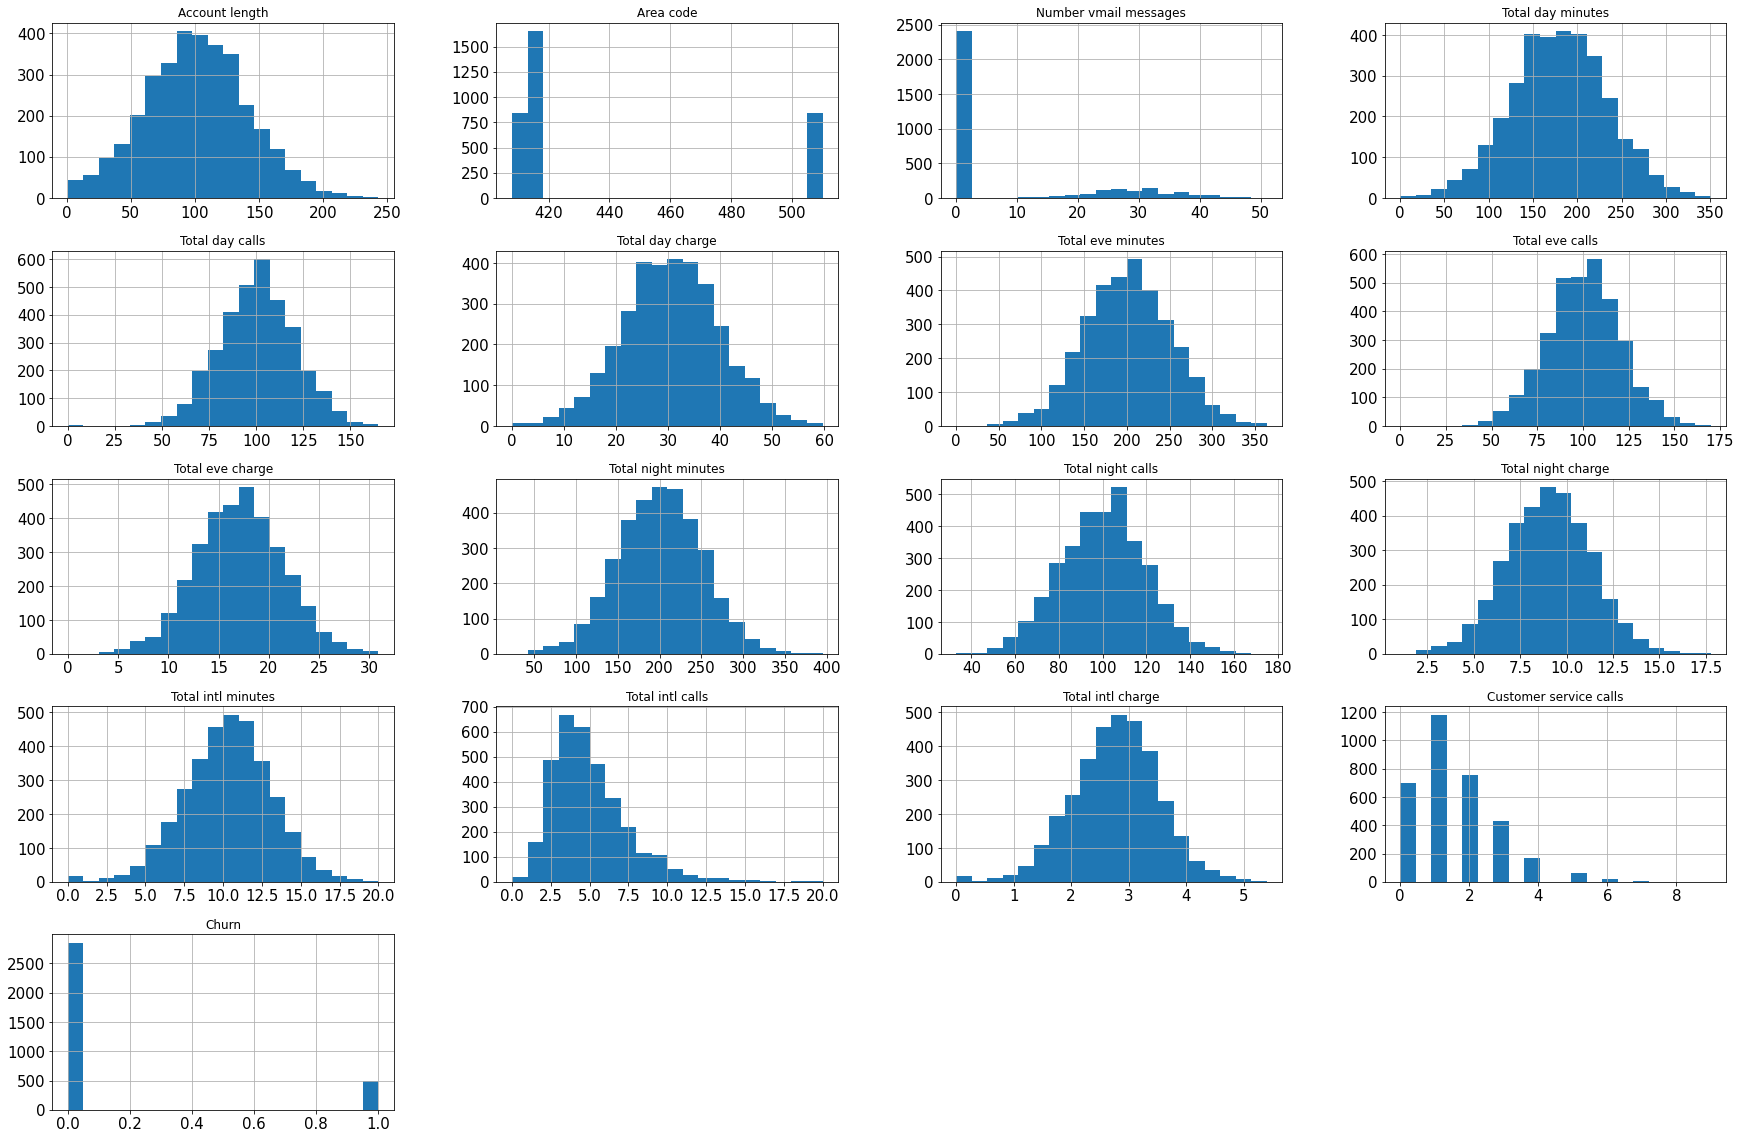

In [ ]:
# using histogram, showing the result of each numeric column and filtering the categorical column.
univar_data=telecom_data.drop(['Voice mail plan','State','International plan'],axis=1)
univar_data.hist(bins=20,figsize=(30,20),xlabelsize=15,ylabelsize=15)

#The above plot shows how each column is reacting in a dataset as of example point of view, it is seen that the 'total intl calls' is skewed right ( its tail is longer on the right )

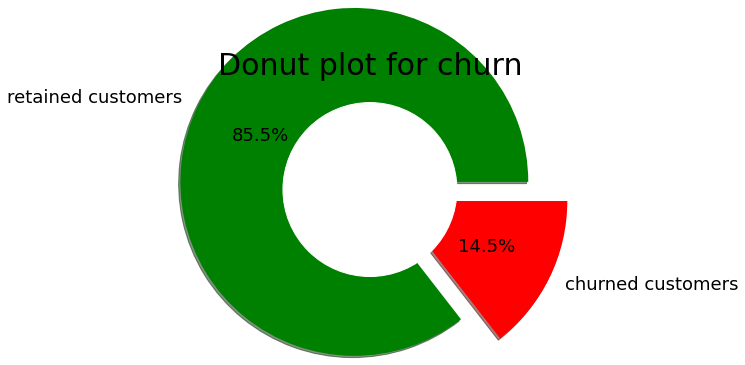

In [ ]:
#plotting churn and not-churn scenerio:
churn_data=telecom_data['Churn'].value_counts()
plt.pie(churn_data,explode=(0.2,0.3),autopct='%1.1f%%',shadow=True,radius=2.0,labels=['retained customers','churned customers'],colors=['green','red'],textprops={'fontsize':18})
centre_circle=plt.Circle((0,0),1,color='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut plot for churn',fontsize=30)
plt.show()

#Conclusion:
# About 15% customers have shifted their services to other telecoms but 85% are still company's true customers.Now we need to analyse why this 15% shifted????

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


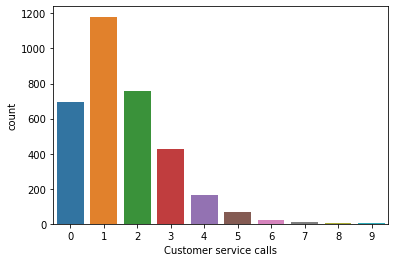

In [ ]:
#plotting count plot for customer service calls.
sns.countplot(univar_data['Customer service calls'])

#Customer service calls gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques

#Bivariate Visualization

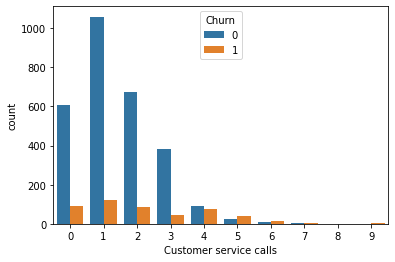

In [ ]:
# checking relation between churn and customer service calls using countplot.
sns.countplot(x='Customer service calls',data=telecom_data,hue='Churn')

#observation: Customer service calls after 4 or more than 4 times leading to increase churn rate percentage

# Now we do analysis of state column

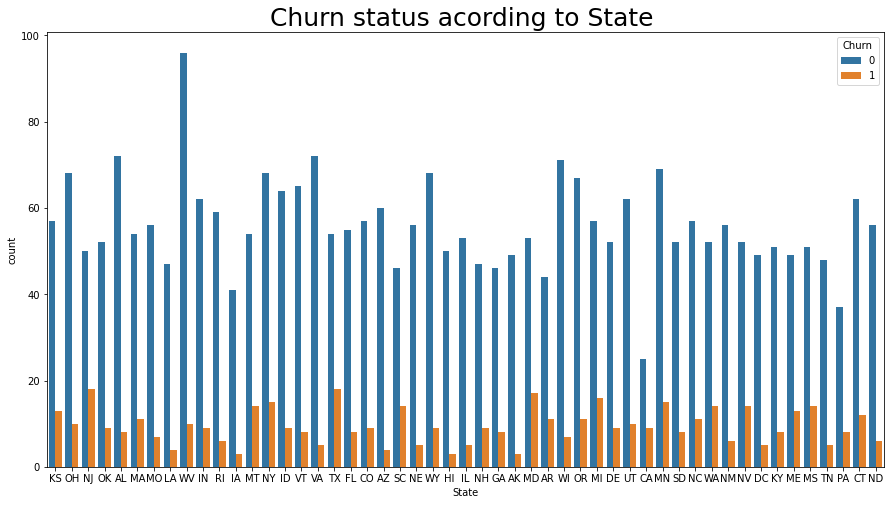

In [ ]:
#now see the churned scenerio by state:
state_effect=telecom_data.groupby('State')['Churn'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='State',hue='Churn',data=telecom_data)
plt.title('Churn status acording to State ',fontsize=25)
plt.show()

#Graph shows churn and not churn count in each state so the maximum non churn count seen in 'WV' and maximum churn count in ('Nj','TX','MD').now let us found top 5 states where churn rate is maximum.

In [ ]:
#finding top 5 churned state
top_ten_churned_state=((telecom_data.groupby('State')['Churn'].mean()*100).sort_values(ascending=False)).head(5)
top_ten_churned_state

State
NJ    26.470588
CA    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
Name: Churn, dtype: float64

Text(0.5, 0, 'State code')

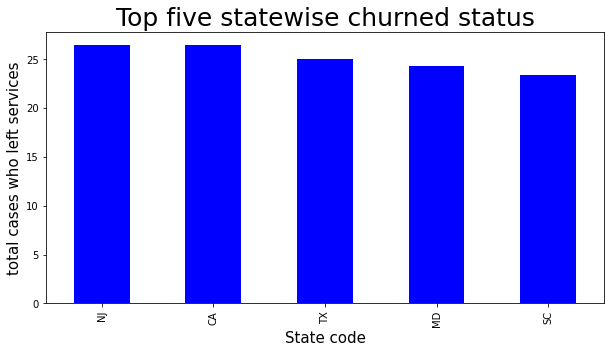

In [ ]:
#plotting bar graph for top 5 states.
plt.figure(figsize=(10,5))

top_ten_churned_state.plot.bar(color=['blue'])

plt.title('Top five statewise churned status',fontsize=25)
plt.ylabel('total cases who left services',fontsize=15)
plt.xlabel('State code' ,fontsize=15)


#It is cleared that among 51 states, 5 states with code- NJ,CA,TX,MD,SC are those where more than 21% people were churned due to some reasons.It might be poor cellular network of these areas or may be charges are high, it is just a guess and now let us analyse our data further...



In [ ]:
# Filtering data based on these top states.
df=telecom_data.loc[telecom_data['State'].isin(['NJ','CA','TX','MD','SC'])]


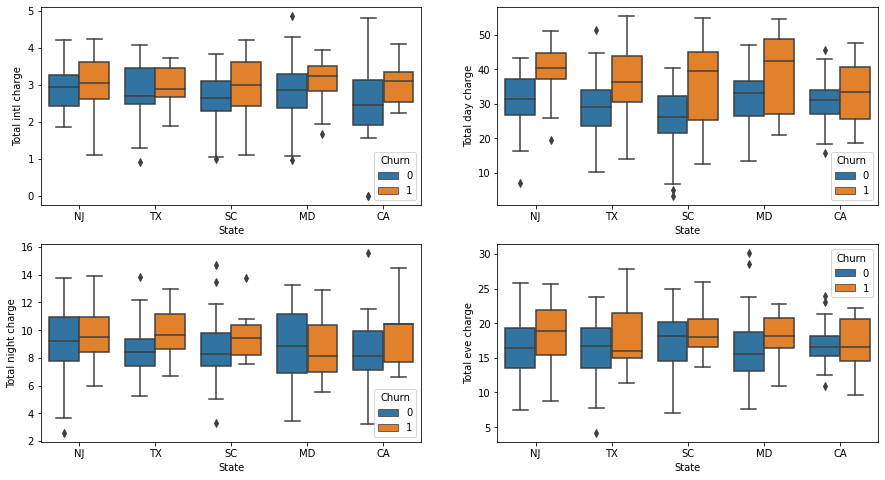

In [ ]:
# boxplot to analyse the call which affect the most.
fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.boxplot(x=df['State'],y=df['Total intl charge'],hue=df['Churn'],ax=axes[0,0])
sns.boxplot(x=df['State'],y=df['Total day charge'],hue=df['Churn'],ax=axes[0,1])
sns.boxplot(x=df['State'],y=df['Total night charge'],hue=df['Churn'],ax=axes[1,0])
sns.boxplot(x=df['State'],y=df['Total eve charge'],hue=df['Churn'],ax=axes[1,1])


#From the above boxplots, it is cleared that customers who left the services in top 5 states that we have filtered above, are facing high call charges.

#Now let us move to area code

In [ ]:
#analysing the area code let us move inside.
area_code_analysis=(telecom_data.groupby("Area code")['Churn'].mean()*100)
area_code_analysis

Area code
408    14.558473
415    14.259819
510    14.880952
Name: Churn, dtype: float64

Text(0.5, 0, 'Area code')

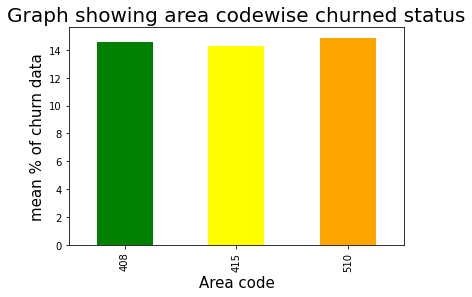

In [ ]:
#let us draw barplot
area_code_analysis.plot.bar(color=['green','yellow','orange'])
plt.title('Graph showing area codewise churned status',fontsize=20)
plt.ylabel('mean % of churn data',fontsize=15)
plt.xlabel('Area code',fontsize=15)


#Area code graph shows that all these three area codes are having the same percentage of churned, so we can't interpret anything here.

#lets move further

# Let us now analysing the account length column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


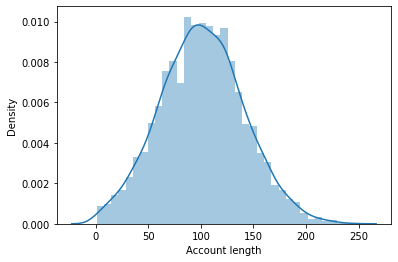

In [ ]:
sns.distplot(telecom_data['Account length'])

# distplot plotted above is symmetric in nature so its mean,median and mode lie on the same line

In [ ]:
#filtering dataset based on churn and not churn.
churn_df=telecom_data.loc[telecom_data['Churn']==1]
not_churn_df=telecom_data.loc[telecom_data['Churn']==0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

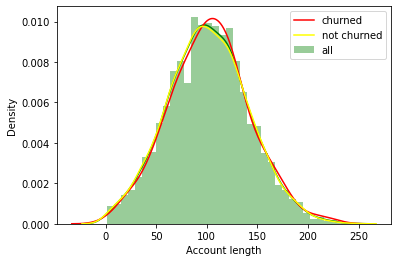

In [ ]:
#plotting a distribution plot.
sns.distplot(telecom_data['Account length'],color='green',label='all')
sns.distplot(churn_df['Account length'],color='red',hist=False,label='churned')
sns.distplot(not_churn_df['Account length'],color='yellow',hist=False,label='not churned')
plt.legend()

#After seeing every aspect of account length column, it can be stated that it doesn't affect much the churn process.Now let's move to other variables.

#Now going to analyse the international plan column

In [ ]:
telecom_data['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
international_plan_count=telecom_data['International plan'].value_counts()
international_plan_count

No     3010
Yes     323
Name: International plan, dtype: int64

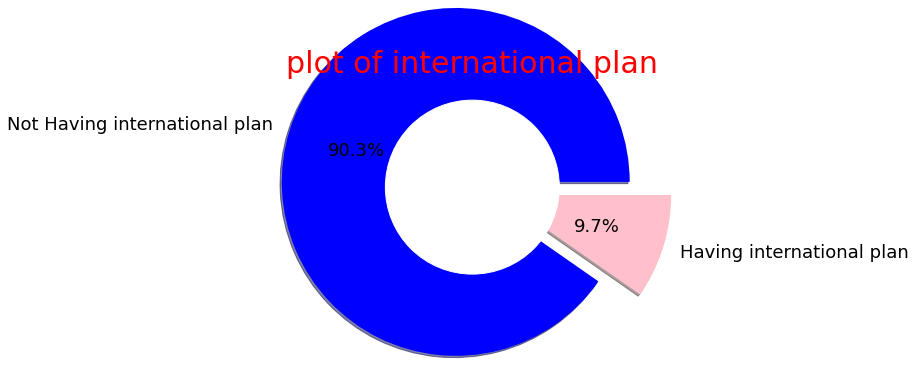

In [ ]:
#plotting donut chart for this:
plt.pie(international_plan_count,explode=(0.2,0.3),autopct='%1.1f%%',shadow=True,radius=2.0,labels=['Not Having international plan','Having international plan'],colors=['blue','pink'],textprops={'fontsize':18})
centre_circle=plt.Circle((0,0),1,color='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('plot of international plan',fontsize=30,color='red')
plt.show()

In [ ]:
international_plan_data=pd.crosstab(telecom_data['International plan'],telecom_data['Churn'])
international_plan_data

Churn,0,1
International plan,,
No,2664,346
Yes,186,137


Text(0, 0.5, 'count')

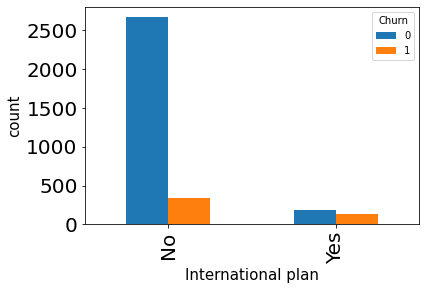

In [ ]:
international_plan_data.plot.bar(fontsize=20)
plt.xlabel('International plan',fontsize=15)
plt.ylabel('count',fontsize=15)


In [ ]:
international_plan_data['Churn percentage']=international_plan_data.apply(lambda x : round(x[1]*100/(x[0]+x[1]),2),axis=1)
international_plan_data

Churn,0,1,Churn percentage
International plan,,,
No,2664,346,11.50
Yes,186,137,42.41


In [ ]:
filter_data=international_plan_data.loc[slice(None),['Churn percentage']]
filter_data

Churn,Churn percentage
International plan,
No,11.50
Yes,42.41


Text(0, 0.5, 'churn percentage')

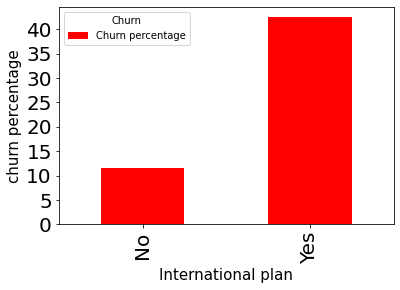

In [ ]:
filter_data.plot.bar(color=['red'],fontsize=20)
plt.xlabel('International plan',fontsize=15)
plt.ylabel('churn percentage',fontsize=15)

#From the above analysis,it can be concluded that:
#most of the people who opted for international plan cancelled their services. the reason might be high charges,call delay etc let us examine further.. 



Text(0.5, 1.0, 'Avg international call charges for churned and retained customer')

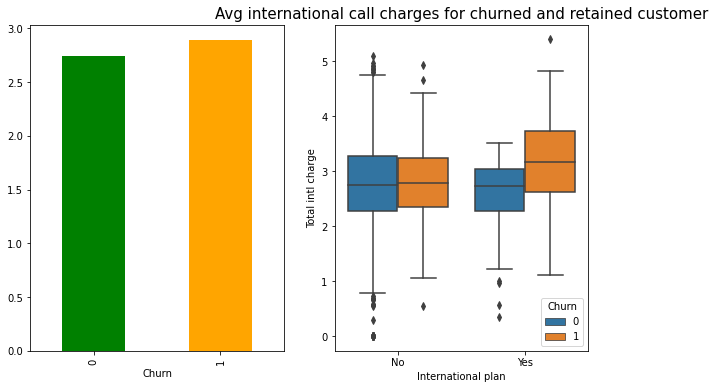

In [ ]:
#let us see international charges also, how it react?
fig,axes=plt.subplots(1,2,figsize=(10,6))
telecom_data.groupby(['Churn'])['Total intl charge'].mean().plot(kind='bar',color=['green','orange'],ax=axes[0])
sns.boxplot(x=telecom_data['International plan'],y=telecom_data['Total intl charge'],hue=telecom_data['Churn'],ax=axes[1])
plt.title('Avg international call charges for churned and retained customer',fontsize=15)

# Here, the graph is showing that the people having international plan who stopped their services, were facing high international call charges and their charges distributed to large area.

# Now let us move to the voice mail plan column

In [ ]:
telecom_data['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
voice_mail_plan_count=telecom_data['Voice mail plan'].value_counts()
voice_mail_plan_count

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

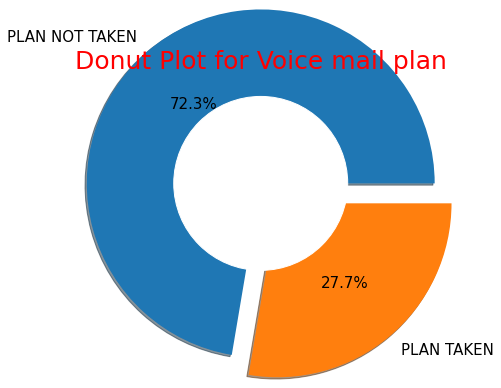

In [ ]:
plt.pie(voice_mail_plan_count,explode=(0,0.3),autopct='%1.1f%%',shadow=True,radius=2.0,labels=['PLAN NOT TAKEN','PLAN TAKEN'],textprops={'fontsize':15})
circle=plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan',fontsize=25,color='red')
plt.show()

In [ ]:
voice_mail_plan=pd.crosstab(telecom_data['Voice mail plan'],telecom_data['Churn'])
voice_mail_plan

Churn,0,1
Voice mail plan,,
No,2008,403
Yes,842,80


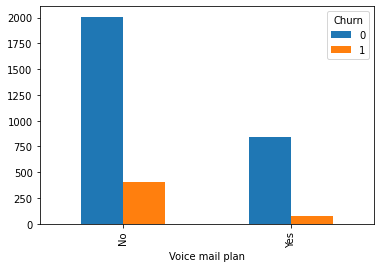

In [ ]:
voice_mail_plan.plot.bar()

In [ ]:
voice_mail_plan['Churn percentage']=voice_mail_plan.apply(lambda x : round(x[1]*100/(x[0]+x[1]),2),axis=1)
voice_mail_plan

Churn,0,1,Churn percentage
Voice mail plan,,,
No,2008,403,16.72
Yes,842,80,8.68


In [ ]:
filter_data=voice_mail_plan.loc[slice(None),['Churn percentage']]
filter_data

Churn,Churn percentage
Voice mail plan,
No,16.72
Yes,8.68


Text(0.5, 0, 'voice mail plan')

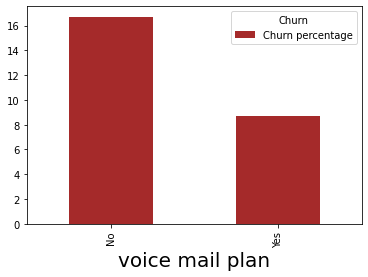

In [ ]:
filter_data.plot.bar(color='brown')
plt.xlabel('voice mail plan',fontsize=20)


#churn percentage in both case cases is above 8% the reason may be:
#1) Those who opted voice mail plan are facing disturbance or high charges.
#2) Those who didn't opted wants some plans but due to high charges, they shifted to other company for better plans.


# Now let us do analysis of number of voice mail column

In [ ]:
telecom_data['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

In [ ]:
filter_df=telecom_data.loc[(telecom_data['Voice mail plan']=='Yes')]

In [ ]:
filter_df['Number vmail messages'].value_counts()

31    60
29    53
28    51
33    46
27    44
30    44
24    42
32    41
26    41
25    37
23    36
36    34
22    32
35    32
39    30
34    29
37    29
21    28
38    25
20    22
19    19
40    16
42    15
17    14
16    13
41    13
43     9
15     9
18     7
44     7
14     7
45     6
12     6
46     4
13     4
47     3
50     2
9      2
8      2
11     2
48     2
49     1
4      1
10     1
51     1
Name: Number vmail messages, dtype: int64

In [ ]:
filter_df['Number vmail messages'].unique()

array([25, 26, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32, 42,
       36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51, 15,
       11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


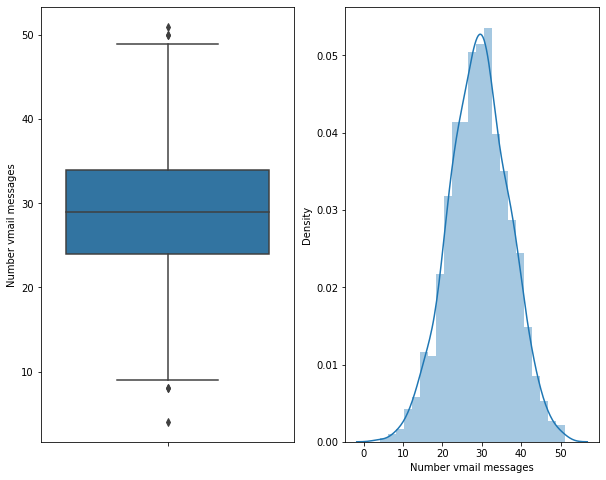

In [ ]:
#plotting box plot and distplot and examine what it is going to show:
fig,axes=plt.subplots(1,2,figsize=(10,8))
sns.boxplot(y=filter_df['Number vmail messages'],ax=axes[0])
sns.distplot(filter_df['Number vmail messages'],ax=axes[1])

#Boxplot and distribution plot shows the symmetericity nature and the mean value is approx 28 and 50% count of vmail messages congested between 25 and 35

#let us analyse the calls section

In [ ]:
df=telecom_data.select_dtypes(exclude=['object'])


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]), <a list of 119 Text major ticklabel objects>)

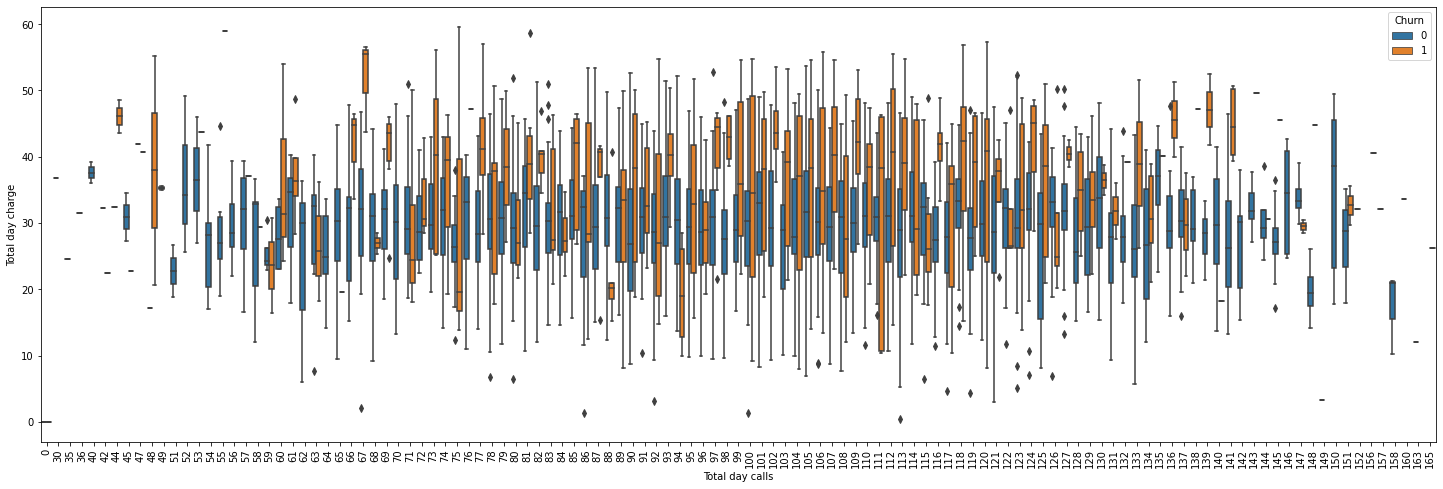

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x=df['Total day calls'],y=df['Total day charge'],hue=df['Churn'])
plt.xticks(rotation=90)

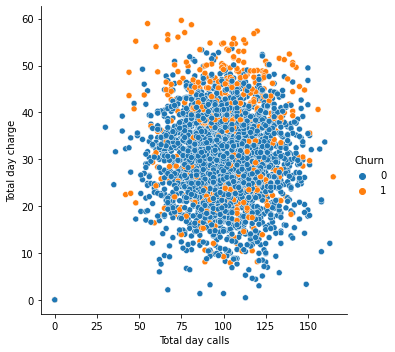

In [ ]:
sns.relplot(x='Total day calls',y='Total day charge',hue='Churn',data=df)

#Graph clearly shows that those who left services are the day caller and they were facing high charge over call so company must provide some discount to retain them.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122]),
 <a list of 123 Text major ticklabel objects>)

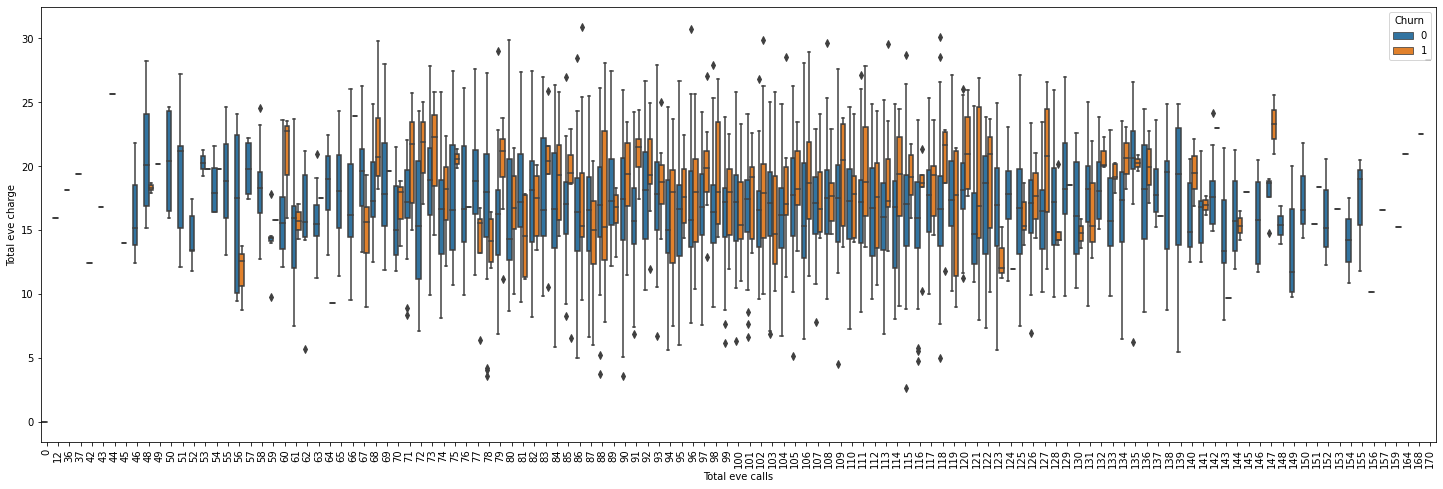

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x=df['Total eve calls'],y=df['Total eve charge'],hue=df['Churn'])
plt.xticks(rotation=90)

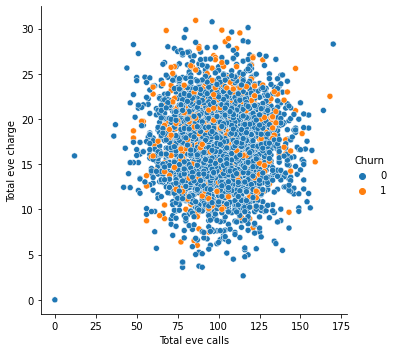

In [ ]:
sns.relplot(x='Total eve calls',y='Total eve charge',hue='Churn',data=df)

#Evening calls and charges are showing us equal results for both churn and not churn customers so it is hard to say anything.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text major ticklabel objects>)

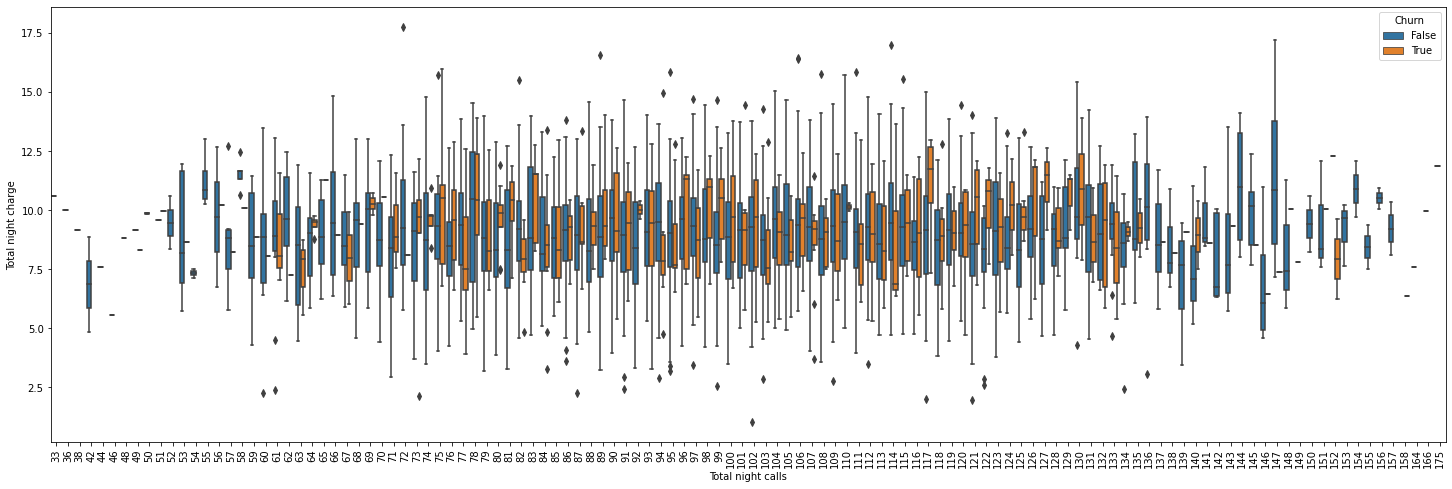

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x=df['Total night calls'],y=df['Total night charge'],hue=df['Churn'])
plt.xticks(rotation=90)

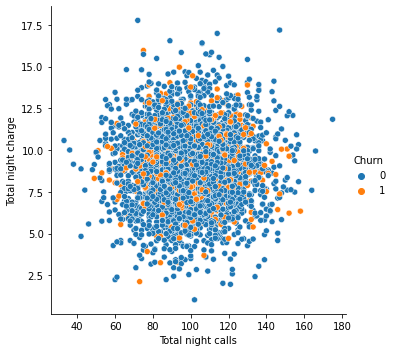

In [ ]:
sns.relplot(x='Total night calls',y='Total night charge',hue='Churn',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

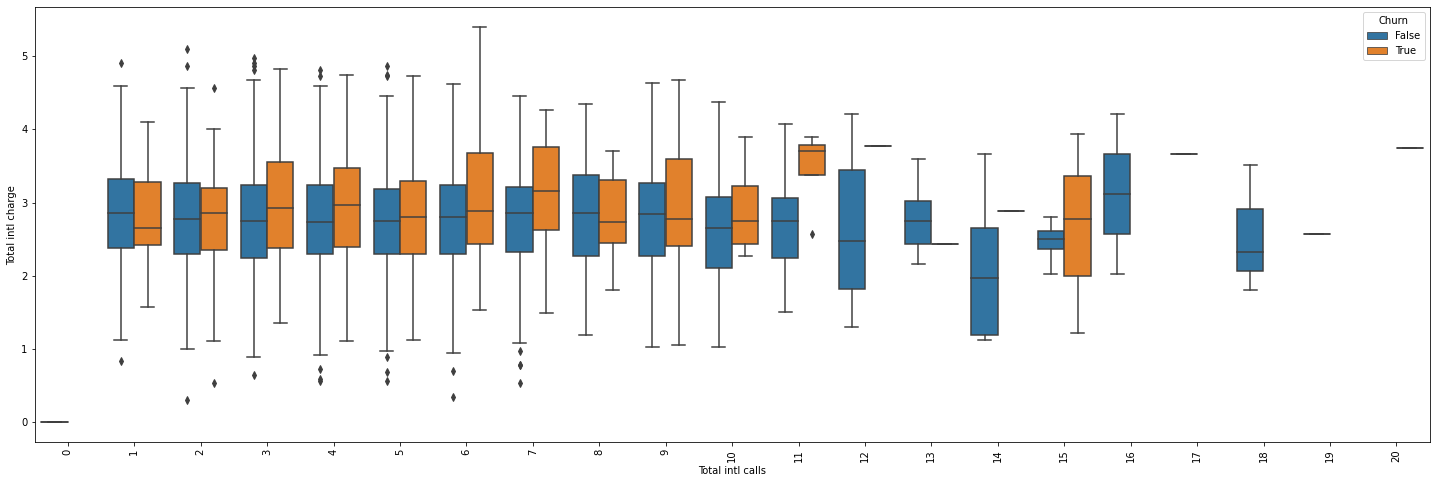

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x=df['Total intl calls'],y=df['Total intl charge'],hue=df['Churn'])
plt.xticks(rotation=90)

#Here it shows that the international charges are highly distributed to larger area for churned customer.

#multivariate analysis

In [ ]:
#correlation between variables
telecom_data.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Text(0.5, 1.0, 'Correlation Heatmap')

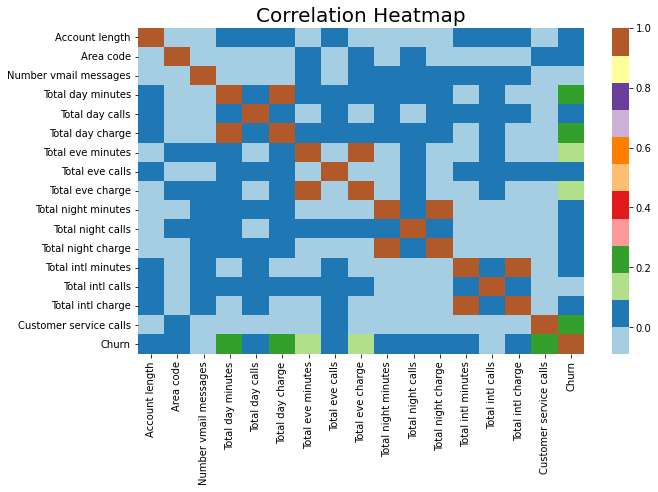

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(univar_data.corr(),cmap='Paired',annot=False)
plt.title("Correlation Heatmap", fontsize=20)

In [ ]:
filter_dataframe=telecom_data.loc[telecom_data['Churn']==1]

Text(0.5, 1.0, 'Correlation Heatmap')

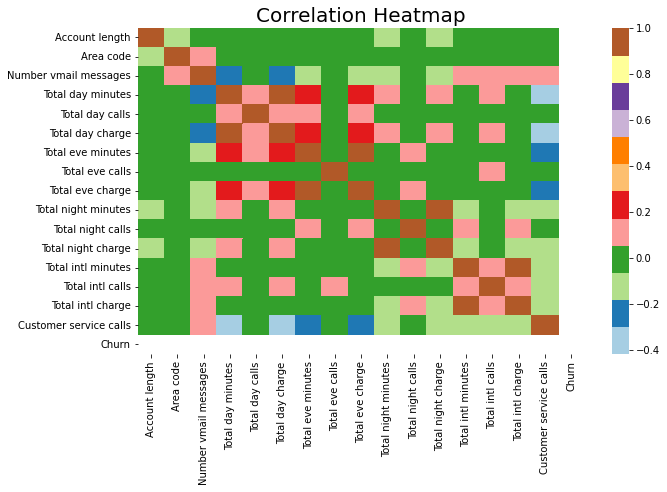

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(filter_dataframe.corr(),cmap='Paired',annot=False)
plt.title("Correlation Heatmap", fontsize=20)

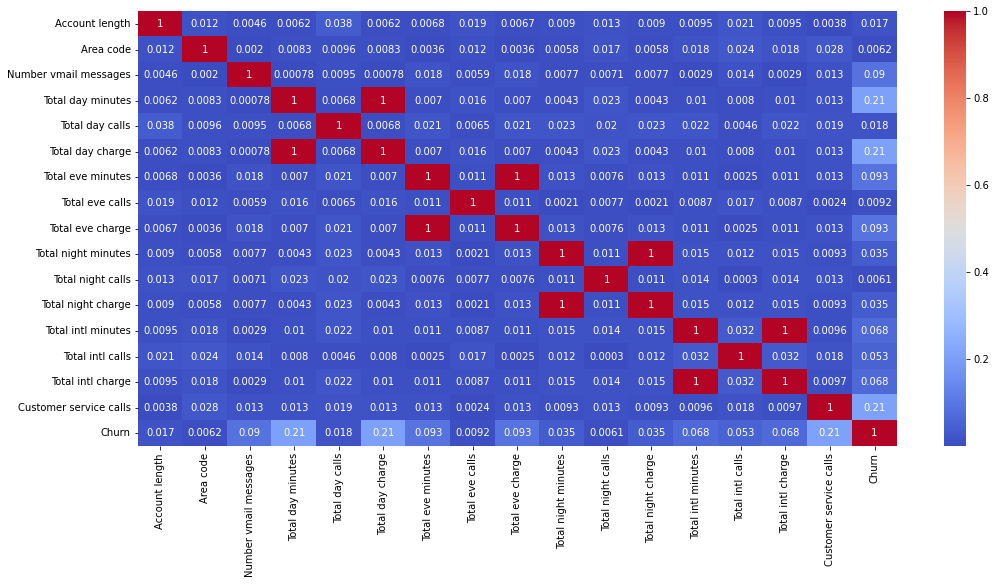

In [ ]:
# plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=telecom_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#found bad correlations between the churn and other columns.

#Conclusion

#After performing exploratory data analysis on the data set, this is what we have incurred from data:


*   There are some states where the churn rate is high as compared to others to low network coverageand high call charges.

*  Those customers who have International plan are churned more and also the international calling charges are also high so the customer unsatisfied with network and call charges.

*   In Customer service calls, data shows us that whenever customer called the service center more than 4 times, the churn rate got high, which means the service center didn't resolve the customer issue.





#RECOMMENDATIONS:



*   Improve network coverage 
*   Provide some discounted international plan and also some discounts over call charges to the customer.

*   Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it as soon as possible.






#Thank You, job is done